In [40]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
df = load_iris()
samples = df.data

In [46]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
model = KMeans(n_clusters=3)
model.fit(samples)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [43]:
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [44]:
new_samples = np.array([[5.7,4.4,1.5,0.4],
              [6.5,3,5.5,1.8],
              [5.8,2.7,5.1,1.9]])
new_labels = model.predict(new_samples)
print(new_labels)

[0 2 1]


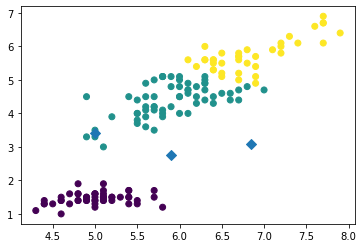

In [48]:
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
centroids = model.cluster_centers_
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]
plt.scatter(xs, ys, c=labels)
plt.scatter(centroid_x,centroid_y, marker='D',s=50)
plt.show()

In [56]:
import pandas as pd
species = np.concatenate([['setosa']*50, ['versicolor']*50, ['virginica']*50], axis=0)
dfn = pd.DataFrame({'labels':labels,'species':species})
print(dfn)

     labels    species
0         0     setosa
1         0     setosa
2         0     setosa
3         0     setosa
4         0     setosa
..      ...        ...
145       2  virginica
146       1  virginica
147       2  virginica
148       2  virginica
149       1  virginica

[150 rows x 2 columns]


In [57]:
ct = pd.crosstab(dfn['labels'],dfn['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36


In [58]:
#inertia measures clustering quality
print(model.inertia_)

78.85144142614601


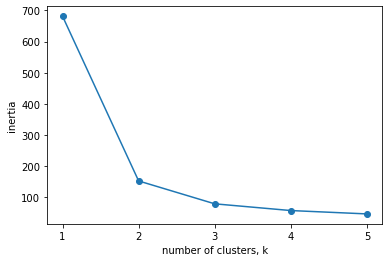

In [61]:
import warnings
warnings.filterwarnings('ignore')

ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
plt.plot(ks, inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [62]:
wine = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv')
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [68]:
wine.var().sort_values()

nonflavanoid_phenols        0.015489
hue                         0.052245
ash                         0.075265
proanthocyanins             0.327595
total_phenols               0.391690
od280                       0.504086
class_label                 0.600679
alcohol                     0.659062
flavanoids                  0.997719
malic_acid                  1.248015
color_intensity             5.374449
alcalinity_of_ash          11.152686
magnesium                 203.989335
proline                 99166.717355
dtype: float64

In [65]:
varieties = wine['class_name']
samples = wine.drop(['class_label','class_name'], axis=1)

In [66]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [67]:
df = pd.DataFrame({'labels':labels,
                  'varieties':varieties})
ct = pd.crosstab(df['labels'],df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1                0      46           1
2               19       0          50


In [69]:
#transforming features for better clusterings
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

In [70]:
samples_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)

